In [1]:
%matplotlib inline


# Transoffset


This illustrates the use of transforms.offset_copy to
make a transform that positions a drawing element such as
a text string at a specified offset in screen coordinates
(dots or inches) relative to a location given in any
coordinates.

Every Artist (Text, Line2D, etc.) has a transform that can be
set when the Artist is created, such as by the corresponding
pyplot command.  By default this is usually the Axes.transData
transform, going from data units to screen dots.  We can
use the offset_copy function to make a modified copy of
this transform, where the modification consists of an
offset.


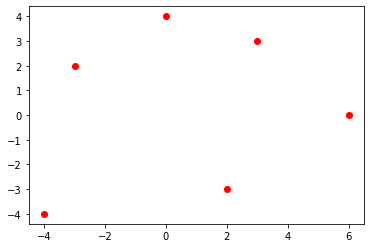

In [11]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np

xs = [6, 2 , 0, -3,-4,3] 
ys =[0, -3, 4, 2 ,-4,3]

#fig = plt.figure(figsize=(5, 10))
# ax = plt.subplot(2, 1, 1)

# If we want the same offset for each text instance,
# we only need to make one transform.  To get the
# transform argument to offset_copy, we need to make the axes
# first; the subplot command above is one way to do this.
#trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
 #                                      x=0.05, y=0.10, units='inches')

for x, y in zip(xs, ys):
    plt.plot(x, y, 'ro')
#    plt.text(x, y, '%d, %d' % (int(x), int(y)), transform=trans_offset)


# offset_copy works for polar plots also.
#ax = plt.subplot(2, 1, 2, projection='polar')

#trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
  #                                     y=6, units='dots')

#for x, y in zip(xs, ys):
#    plt.polar(x, y, 'ro')
 #   plt.text(x, y, '%d, %d' % (int(x), int(y)),
  #           transform=trans_offset,
  #           horizontalalignment='center',
   #          verticalalignment='bottom')

plt.show()

In [8]:
xs

[6, 2, 0, -3, -4, 3]

In [9]:
ys

[0, -3, 4, 2, -4, 3]

In [1]:
# sphinx_gallery_thumbnail_number = 3
import matplotlib.pyplot as plt
import numpy as np

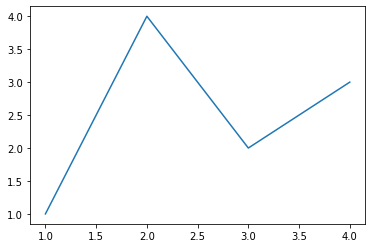

In [2]:
fig, ax = plt.subplots() # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]) # Plot some data on the axes.

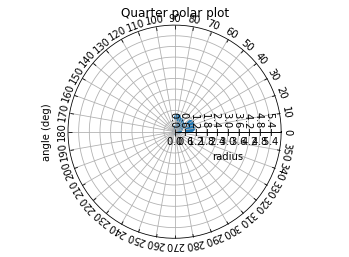

In [7]:
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.floating_axes import GridHelperCurveLinear, FloatingSubplot
import mpl_toolkits.axisartist.grid_finder as gf


def generate_polar_axes():
    polar_trans = PolarAxes.PolarTransform()

    # Setup the axis, here we map angles in degrees to angles in radius
    phi_degree = np.arange(0, 360, 10)
    tlocs = phi_degree * np.pi / 180
    gl1 = gf.FixedLocator(tlocs)  # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, phi_degree))))

    # Standard deviation axis extent
    radius_min = 0
    radius_max = 6

    # Set up the axes range in the parameter "extremes"
    ghelper = GridHelperCurveLinear(polar_trans, extremes=(0, 2*np.pi,  # 1st quadrant
                                                           radius_min, radius_max),
                                    grid_locator1=gl1,
                                    tick_formatter1=tf1,
                                    )

    figure = plt.figure()

    floating_ax = FloatingSubplot(figure, 111, grid_helper=ghelper)
    figure.add_subplot(floating_ax)

    # Adjust axes
    floating_ax.axis["top"].set_axis_direction("bottom")  # "Angle axis"
    floating_ax.axis["top"].toggle(ticklabels=True, label=True)
    floating_ax.axis["top"].major_ticklabels.set_axis_direction("top")
    floating_ax.axis["top"].label.set_axis_direction("top")
    floating_ax.axis["top"].label.set_text("angle (deg)")

    floating_ax.axis["left"].set_axis_direction("bottom")  # "X axis"
    floating_ax.axis["left"].label.set_text("radius")

    floating_ax.axis["right"].set_axis_direction("top")  # "Y axis"
    floating_ax.axis["right"].toggle(ticklabels=True)
    floating_ax.axis["right"].major_ticklabels.set_axis_direction("left")

    floating_ax.axis["bottom"].set_visible(False)  # Useless

    # Contours along standard deviations
    floating_ax.grid(True)
    floating_ax.set_title("Quarter polar plot")

    data_ax = floating_ax.get_aux_axes(polar_trans)  # return the axes that can be plotted on

    return figure, data_ax


if __name__ == "__main__":
    
    # Plot data onto the defined polar axes
    fig, ax = generate_polar_axes()

    theta = np.random.rand(10) * np.pi / 2

    radius = np.random.rand(10)

    ax.scatter(theta, radius)

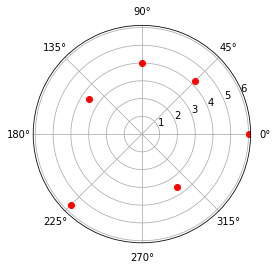

In [12]:
phi = [0,-0.98279, 1.57080,  2.55359, -2.35619, 0.78540]

r = [6, 3.60555, 4.00000, 3.60555, 5.65685, 4.24264]

for phi, r in zip(phi, r):
    plt.polar(phi, r, 'ro')

plt.show()

In [13]:
re =   [6, 2 , 0, -3,-4,3] 
im =  [0, -3, 4, 2 ,-4,3]

In [4]:
import cmath

In [19]:
for re, im in zip(re, im):
cmath.polar([re,im])

IndentationError: expected an indented block (<ipython-input-19-87af177c3e94>, line 2)

In [1]:
lista =[6,2-3j,4j,-3+2j,-4-4j,3+3j]

In [2]:
lista

[6, (2-3j), 4j, (-3+2j), (-4-4j), (3+3j)]

In [6]:
cmath.polar(lista[1])

(3.605551275463989, -0.982793723247329)

In [7]:
for x in range(0, 3):
    print("We're on time %d" % (x))

We're on time 0
We're on time 1
We're on time 2


In [172]:
pol = []
for i in lista:
     pol.append( cmath.polar(i) )

In [187]:
radio = []
ang = []
for i in lista:
    ang.append( cmath.phase(i) )
    radio.append( abs(i) )

In [151]:
for n in pol:
     print('(%.2f < %.3f rad)'%n)

(6.00 < 0.000 rad)
(3.61 < -0.983 rad)
(4.00 < 1.571 rad)
(3.61 < 2.554 rad)
(5.66 < -2.356 rad)
(4.24 < 0.785 rad)


In [174]:
phi = [0,-0.98279, 1.57080,  2.55359, -2.35619, 0.78540]
r = [6, 3.60555, 4.00000, 3.60555, 5.65685, 4.24264]

for phi, r in zip(phi, r):
    plt.polar(phi, r, 'ro')

plt.show()

(6.0, 0.0)

In [181]:
cmath.phase(lista[1])

-0.982793723247329

In [189]:
ang

[0.0,
 -0.982793723247329,
 1.5707963267948966,
 2.5535900500422257,
 -2.356194490192345,
 0.7853981633974483]

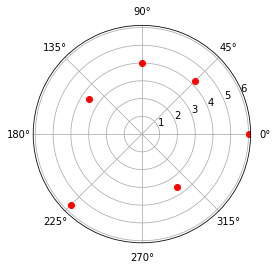

In [190]:
for ang, radio in zip(ang, radio):
    plt.polar(ang, radio, 'ro')

plt.show()